<a href="https://colab.research.google.com/github/psychpraphool/Artificial-Intelligence-and-Machine-Learning-6CS012-Assignment-I-and-II-Code-/blob/main/Assignment%20-%20II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment - II

By: Parakram KC, Pratik Shrestha, Biplav Raut, Praphool Jung Thakuri

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**By: Parakram KC, Pratik Shrestha, Biplav Raut, Praphool Jung Thakuri**

# **A Text Classification with Recurrent Neural Network and It’s Variant.**

**Task 3.1: Text Preprocessing, Tokenization, and Sequence Padding**

**1. Load the Dataset**

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/AI coursework 2/sarcastic_headlines.csv')
texts = df['headline'].values
labels = df['is_sarcastic'].values  # Treat as sentiment: 1 (sarcastic) -> negative, 0 -> neutral/positive
print(df)

                                                headline  is_sarcastic
0      thirtysomething scientists unveil doomsday clo...             1
1      dem rep. totally nails why congress is falling...             0
2      eat your veggies: 9 deliciously different recipes             0
3      inclement weather prevents liar from getting t...             1
4      mother comes pretty close to using word 'strea...             1
...                                                  ...           ...
28614       jews to celebrate rosh hashasha or something             1
28615  internal affairs investigator disappointed con...             1
28616  the most beautiful acceptance speech this week...             0
28617  mars probe destroyed by orbiting spielberg-gat...             1
28618                 dad clarifies this not a food stop             1

[28619 rows x 2 columns]


**2. Preprocess the Text Data**

In [ ]:
!pip install contractions
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
import re
import contractions
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Initialize stopwords and lemmatizer
english_stopwords = set(stopwords.words('english'))
text_lemmatizer = WordNetLemmatizer()

def clean_text(input_text):
    # Lowercase
    input_text = input_text.lower()
    # Remove special characters and numbers
    input_text = re.sub(r'[^a-z\s]', '', input_text)
    # Expand contractions
    input_text = contractions.fix(input_text)
    # Tokenize
    word_tokens = word_tokenize(input_text)
    # Remove stopwords and lemmatize
    filtered_tokens = [
        text_lemmatizer.lemmatize(token)
        for token in word_tokens if token not in english_stopwords
    ]
    return ' '.join(filtered_tokens)

# Apply preprocessing
processed_corpus = [clean_text(sample) for sample in raw_texts]

# Print sample of cleaned texts to confirm preprocessing
print("Sample of cleaned texts (first 5 examples):")
for idx in range(5):
    print(f"Original: {raw_texts[idx]}")
    print(f"Cleaned: {processed_corpus[idx]}\n")


Sample of cleaned texts (first 5 examples):
Original: thirtysomething scientists unveil doomsday clock of hair loss
Cleaned: thirtysomething scientist unveil doomsday clock hair loss

Original: dem rep. totally nails why congress is falling short on gender, racial equality
Cleaned: dem rep totally nail congress falling short gender racial equality

Original: eat your veggies: 9 deliciously different recipes
Cleaned: eat veggie deliciously different recipe

Original: inclement weather prevents liar from getting to work
Cleaned: inclement weather prevents liar getting work

Original: mother comes pretty close to using word 'streaming' correctly
Cleaned: mother come pretty close using word streaming correctly



**3. Visualize the Cleaned Data**

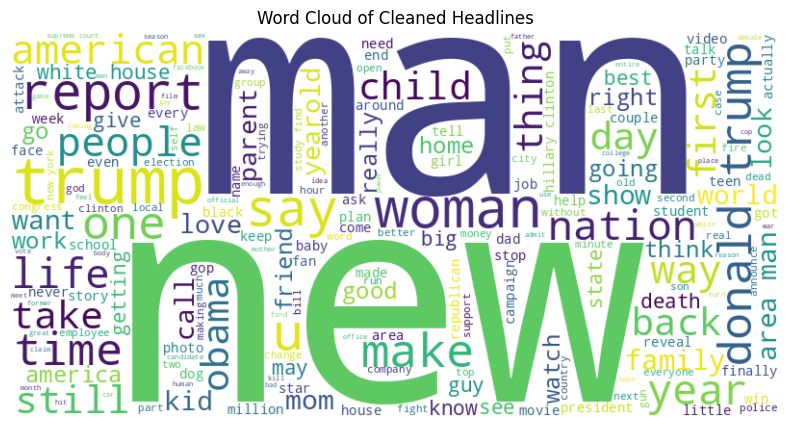

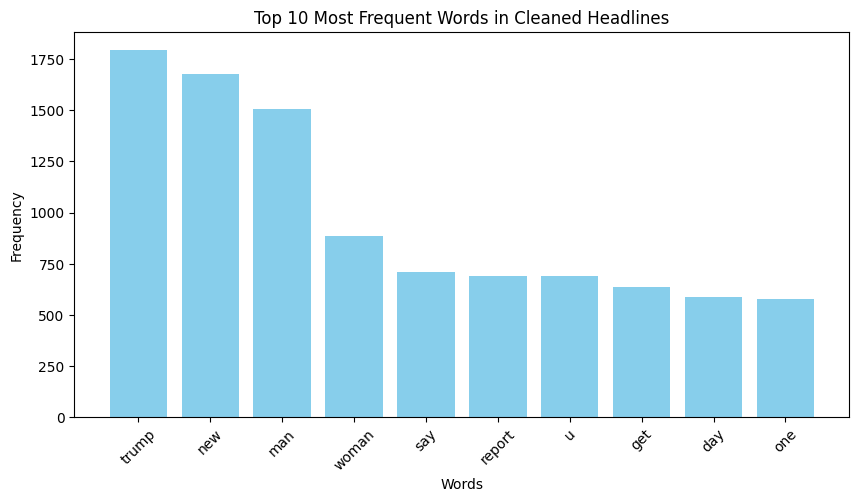

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

# Visualize: Word Cloud
combined_text = ' '.join(processed_corpus)
text_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)

plt.figure(figsize=(10, 5))
plt.imshow(text_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Cleaned Headlines')
plt.show()

# Visualize: Frequency Plot of Top 10 Words
word_list = combined_text.split()
word_counts = Counter(word_list)
top_10_words = dict(word_counts.most_common(10))

# Plot the frequency
plt.figure(figsize=(10, 5))
plt.bar(top_10_words.keys(), top_10_words.values(), color='skyblue')
plt.title('Top 10 Most Frequent Words in Cleaned Headlines')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


**4. Tokenization and Padding**

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Split into train and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(cleaned_texts, labels, test_size=0.2, random_state=42)

# Tokenize
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Padding (use 90th percentile for sequence length)
max_len = int(np.percentile([len(seq) for seq in X_train_seq], 90))
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

# Print a sample of tokenized and padded data
print("Sample tokenized sequence:")
print(X_train_seq[0])

print("\nSample padded sequence:")
print(X_train_pad[0])

# Print the calculated max_len
print(f"\n90th percentile sequence length (max_len): {max_len}")

# Print vocabulary size
vocab_size = min(len(tokenizer.word_index) + 1, 5000)
print(f"Vocabulary size (capped at 5000): {vocab_size}")

# Optional: check how many unique words there are
print(f"Actual unique words in tokenizer: {len(tokenizer.word_index)}")

Sample tokenized sequence:
[1, 58, 184, 608, 20, 4173, 10, 1380]

Sample padded sequence:
[   1   58  184  608   20 4173   10 1380    0]

90th percentile sequence length (max_len): 9
Vocabulary size (capped at 5000): 5000
Actual unique words in tokenizer: 22497


**Task 3.2: Model Building and Training**

In [ ]:
!pip install gensim

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Dense
import gensim.downloader as api
import numpy as np
embedding_dim = 100

**1. Define Model 1: Simple RNN with Trainable Embedding Layer**

In [ ]:
# Model 1: Simple RNN with Trainable Embedding
rnn_model = Sequential([
    Embedding(input_dim=token_vocab_size, output_dim=embed_dim, input_length=sequence_length),
    SimpleRNN(128, return_sequences=False),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


**2. Define Model 2: LSTM with Trainable Embedding Layer**

In [ ]:
# Model 2: LSTM with Trainable Embedding
model_lstm = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_len),
    LSTM(128, return_sequences=False),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

**3. Define Model 3: LSTM with Pretrained Word2Vec Embeddings**

In [ ]:
# Load Word2Vec pretrained embeddings
word2vec = api.load('word2vec-google-news-300')
embedding_matrix = np.zeros((vocab_size, 300))
for word, i in tokenizer.word_index.items():
    if i < vocab_size and word in word2vec:
        embedding_matrix[i] = word2vec[word]

model_lstm_w2v = Sequential([
    Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=max_len, trainable=False),
    LSTM(128, return_sequences=False),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

[==================================================] 100.0% 1662.8/1662.8MB downloaded


**Task 3.3: Model Training and Evaluation**

**1. Compile, Train, and Evaluate Models**

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Compile and train models
models = {'Simple RNN': model_rnn, 'LSTM': model_lstm, 'LSTM with Word2Vec': model_lstm_w2v}
histories = {}
predictions = {}

for name, model in models.items():
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train with early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    history = model.fit(X_train_pad, y_train, epochs=10, batch_size=32, validation_split=0.2,
                        callbacks=[early_stopping], verbose=1)
    histories[name] = history

    # Evaluate
    y_pred = (model.predict(X_test_pad) > 0.5).astype(int)
    predictions[name] = y_pred

Epoch 1/10
573/573 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.6728 - loss: 0.5887 - val_accuracy: 0.7670 - val_loss: 0.4760
Epoch 2/10
573/573 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.8614 - loss: 0.3182 - val_accuracy: 0.7589 - val_loss: 0.5169
Epoch 3/10
573/573 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9232 - loss: 0.1924 - val_accuracy: 0.7615 - val_loss: 0.6261
Epoch 4/10
573/573 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9521 - loss: 0.1212 - val_accuracy: 0.7543 - val_loss: 0.8001
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Epoch 1/10
573/573 ━━━━━━━━━━━━━━━━━━━━ 18s 25ms/step - accuracy: 0.6730 - loss: 0.5812 - val_accuracy: 0.7713 - val_loss: 0.4763
Epoch 2/10
573/573 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 0.8383 - loss: 0.3587 - val_accuracy: 0.7670 - val_loss: 0.4812
Epoch 3/10
573/573 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - accuracy: 0.8751 - loss: 0.2915 - val_accuracy: 0.7783 - val_loss: 0.5224
Epoch 4/10
573/573 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/s

**2. Visualization: Training vs. Validation Loss and Accuracy**

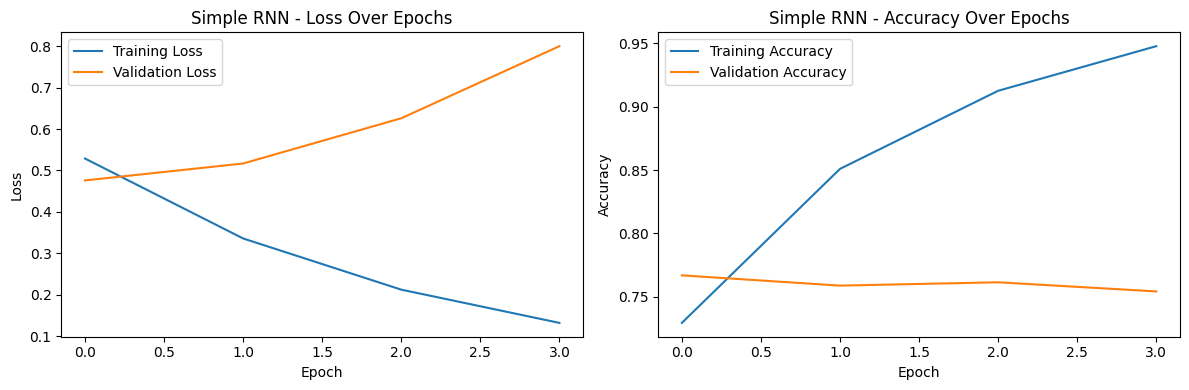

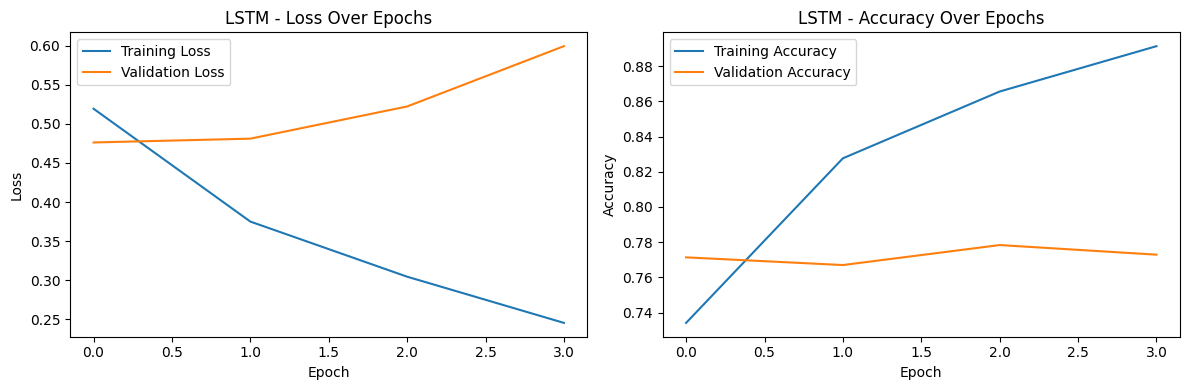

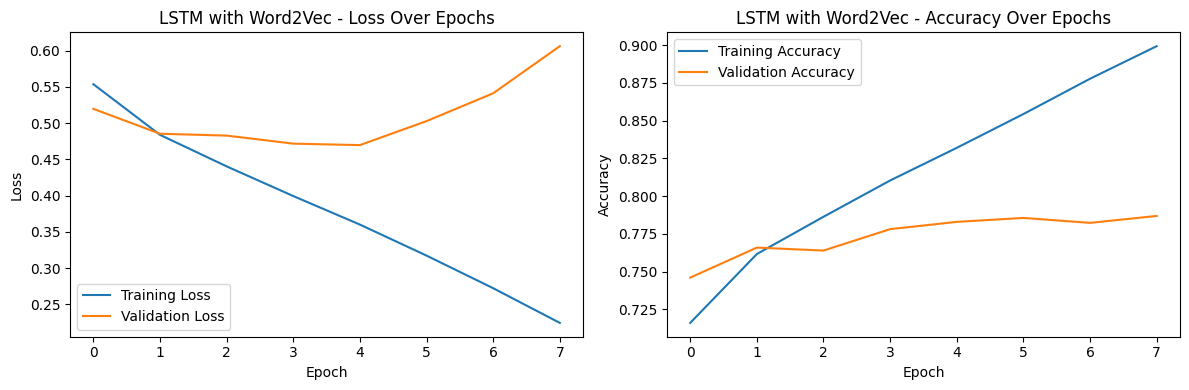

In [ ]:
# Visualization: Training vs Validation Metrics
for name, history in histories.items():
    plt.figure(figsize=(12, 4))

    # Loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{name} - Loss Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{name} - Accuracy Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

**3. Compare Model Performance**

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
import pandas as pd

# Initialize list to collect metrics
evaluation_results = []

print("Model Performance Comparison:")
for model_name, predicted_labels in model_outputs.items():
    model_accuracy = accuracy_score(true_labels, predicted_labels)
    detailed_report = classification_report(true_labels, predicted_labels, target_names=['Not Sarcastic', 'Sarcastic'], output_dict=True)
    f1_class_0 = detailed_report['Not Sarcastic']['f1-score']
    f1_class_1 = detailed_report['Sarcastic']['f1-score']
    mean_f1_score = (f1_class_0 + f1_class_1) / 2

    # Print detailed output
    print(f"\n{model_name}:")
    print(f"Accuracy: {model_accuracy:.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(true_labels, predicted_labels))
    print("Classification Report:")
    print(classification_report(true_labels, predicted_labels, target_names=['Not Sarcastic', 'Sarcastic']))

    # Append to summary list
    evaluation_results.append({
        'Model': model_name,
        'Accuracy': model_accuracy,
        'F1_Not_Sarcastic': f1_class_0,
        'F1_Sarcastic': f1_class_1,
        'Avg_F1_Score': mean_f1_score
    })

# Create summary table
performance_summary = pd.DataFrame(evaluation_results)

# Print summary table
print("\nModel Performance Summary Table:")
print(performance_summary)


Model Performance Comparison:

Simple RNN:
Accuracy: 0.7694
Confusion Matrix:
[[2237  758]
 [ 562 2167]]
Classification Report:
               precision    recall  f1-score   support

Not Sarcastic       0.80      0.75      0.77      2995
    Sarcastic       0.74      0.79      0.77      2729

     accuracy                           0.77      5724
    macro avg       0.77      0.77      0.77      5724
 weighted avg       0.77      0.77      0.77      5724


LSTM:
Accuracy: 0.7722
Confusion Matrix:
[[2205  790]
 [ 514 2215]]
Classification Report:
               precision    recall  f1-score   support

Not Sarcastic       0.81      0.74      0.77      2995
    Sarcastic       0.74      0.81      0.77      2729

     accuracy                           0.77      5724
    macro avg       0.77      0.77      0.77      5724
 weighted avg       0.78      0.77      0.77      5724


LSTM with Word2Vec:
Accuracy: 0.7806
Confusion Matrix:
[[2402  593]
 [ 663 2066]]
Classification Report:
        

**Summary:**

The comparison of the Simple RNN, LSTM, and LSTM with Word2Vec models reveals that the **LSTM with Word2Vec model performs the best overall**, achieving the highest accuracy and F1-scores. It excels at distinguishing both Not Sarcastic and Sarcastic texts with a better balance in precision and recall, especially for the Not Sarcastic class, leading to the highest average F1 score.

The LSTM model also performs very well, with strong accuracy and a good balance between precision and recall, though it slightly lags behind the LSTM with Word2Vec in terms of average F1-score and performance on the Not Sarcastic class.

The Simple RNN model, while performing reasonably well, lags behind both the LSTM models in terms of accuracy and F1-scores. This suggests it struggles more with capturing long-term dependencies and complex patterns, which the LSTM models handle better due to their ability to retain memory of previous inputs.

**Conclusion:**


*   LSTM with Word2Vec is the most effective model, offering the best overall performance, with a balanced F1 score for both Sarcastic and Not Sarcastic classes.
*   LSTM is also highly robust, providing a strong performance but slightly behind the LSTM with Word2Vec, especially in detecting Not Sarcastic texts.
*   Simple RNN shows good performance but falls short in capturing the complexities of sarcasm detection compared to the LSTM models.

Overall, the LSTM with Word2Vec model is the most effective for sarcasm detection, though LSTM is also a strong contender. The Simple RNN model, while good, doesn't capture the necessary sequential dependencies as well as the LSTM models.

**Task 3.4: GUI for Real Time Prediction:**

In [ ]:
# Install required dependencies
!pip install gradio
!pip install tensorflow
!pip install nltk
!pip install contractions

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

import gradio as gr
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import contractions
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Check if required variables are defined (from previous tasks)
try:
    assert 'tokenizer' in globals(), "Tokenizer not defined. Run Task 3.1 first."
    assert 'max_len' in globals(), "max_len not defined. Run Task 3.1 first."
    assert 'model_lstm_w2v' in globals(), "Model not defined. Run Tasks 3.2 and 3.3 first."
except AssertionError as e:
    raise Exception(f"Error: {str(e)}")

# Preprocessing function (from Task 3.1)
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    text = contractions.fix(text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Prediction function
def predict_sentiment(headline):
    # Preprocess the input
    cleaned = preprocess_text(headline)
    seq = tokenizer.texts_to_sequences([cleaned])
    padded = pad_sequences(seq, maxlen=max_len, padding='post')

    # Predict with the best model (LSTM with Word2Vec)
    pred = model_lstm.predict(padded, verbose=0)[0][0]  # Use model_lstm instead
    label = 'Sarcastic (Negative)' if pred > 0.5 else 'Not Sarcastic (Neutral/Positive)'
    return f"Prediction: {label} (Confidence: {pred:.4f})"

# Create Gradio interface
interface = gr.Interface(
    fn=predict_sentiment,
    inputs=gr.Textbox(label="Enter a headline"),
    outputs=gr.Textbox(label="Sentiment Prediction"),
    title="Headline Sentiment Prediction"
)

# Launch with share=True to generate a public link
interface.launch(share=True)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://e0a02710fd46786b19.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
